In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor,
    AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu
file_path = '/kaggle/input/misshanooi/Impute_misvalues_hanoi.csv'
data = pd.read_csv(file_path)

# Xử lý cột Average: chuyển 'NA' thành NaN, các giá trị số thành float
data['Average_clean'] = pd.to_numeric(data['Average'], errors='coerce')

print("=== THÔNG TIN DỮ LIỆU ===")
print(f"Tổng số dòng: {len(data)}")
print(f"Số giá trị missing trong Average: {data['Average_clean'].isna().sum()}")
print(f"Tỷ lệ missing: {data['Average_clean'].isna().sum() / len(data) * 100:.2f}%")
print(f"\nGiá trị min: {data['Average_clean'].min():.2f}")
print(f"Giá trị max: {data['Average_clean'].max():.2f}")
print("\n10 dòng đầu:")
print(data[['Date', 'Hour', 'Waterlevel', 'Average', 'Average_clean']].head(10))


=== THÔNG TIN DỮ LIỆU ===
Tổng số dòng: 29224
Số giá trị missing trong Average: 25910
Tỷ lệ missing: 88.66%

Giá trị min: 43.00
Giá trị max: 930.00

10 dòng đầu:
       Date  Hour  Waterlevel  Average  Average_clean
0  1/1/2008     1       130.0      NaN            NaN
1       NaN     4       121.0      NaN            NaN
2  1/1/2008     7       112.0      NaN            NaN
3       NaN    10       113.5      NaN            NaN
4  1/1/2008    13       115.0      NaN            NaN
5       NaN    16       118.5      NaN            NaN
6  1/1/2008    19       122.0    120.0          120.0
7       NaN    22       120.0      NaN            NaN
8  1/2/2008     1       118.0      NaN            NaN
9       NaN     4       117.0      NaN            NaN


In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor,
    AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
)
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
print("✓ Import thành công")


✓ Import thành công


In [39]:
file_path = '/kaggle/input/misshanooi/Impute_misvalues_hanoi.csv'
data = pd.read_csv(file_path)

# Xử lý cột Waterlevel và Average - DỮ LIỆU GỐC
data['Waterlevel_clean'] = pd.to_numeric(data['Waterlevel'], errors='coerce')
data['Average_original'] = pd.to_numeric(data['Average'], errors='coerce')

print(f"Tổng số dòng: {len(data)}")
print(f"Waterlevel missing: {data['Waterlevel_clean'].isna().sum()}")
print(f"Average missing: {data['Average_original'].isna().sum()}")


Tổng số dòng: 29224
Waterlevel missing: 0
Average missing: 25910


In [25]:
# Chỉ lấy những điểm có cả Waterlevel và Average
train_mask = data['Waterlevel_clean'].notna() & data['Average_clean'].notna()
train_X = data.loc[train_mask, 'Waterlevel_clean'].values.reshape(-1, 1)
train_y = data.loc[train_mask, 'Average_clean'].values

# Mask cho imputation
missing_mask = data['Average_clean'].isna() & data['Waterlevel_clean'].notna()
to_impute_X = data.loc[missing_mask, 'Waterlevel_clean'].values.reshape(-1, 1)

print(f"Số mẫu training: {len(train_X)}")
print(f"Số điểm cần impute: {len(to_impute_X)}")


Số mẫu training: 3314
Số điểm cần impute: 25910


In [40]:
# Training set: những điểm có cả Waterlevel và Average
train_mask = data['Waterlevel_clean'].notna() & data['Average_original'].notna()
train_X = data.loc[train_mask, 'Waterlevel_clean'].values.reshape(-1, 1)
train_y = data.loc[train_mask, 'Average_original'].values

# Mask cho imputation (dùng chung)
missing_mask = data['Average_original'].isna() & data['Waterlevel_clean'].notna()
to_impute_X = data.loc[missing_mask, 'Waterlevel_clean'].values.reshape(-1, 1)

print(f"Số mẫu training (CHUNG CHO TẤT CẢ MODEL): {len(train_X)}")
print(f"Số điểm cần impute: {len(to_impute_X)}")


Số mẫu training (CHUNG CHO TẤT CẢ MODEL): 3314
Số điểm cần impute: 25910


In [41]:
print("Training Linear Regression...")

# Khởi tạo model
model_lr = LinearRegression()

# Train model trên DỮ LIỆU GỐC
model_lr.fit(train_X, train_y)

# Predict cho các điểm missing
pred_lr = model_lr.predict(to_impute_X)

# Gán giá trị imputed (bắt đầu từ dữ liệu gốc)
imputed_lr = data['Average_original'].copy()
imputed_lr.loc[missing_mask] = pred_lr
data['LR'] = imputed_lr

# Đánh giá
pred_train = model_lr.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['LR'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Linear Regression...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 11.7786, RMSE: 15.9134, R²: 0.9890


In [42]:
print("Training KNN...")

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_knn = model_knn.predict(to_impute_X)

# BẮT ĐẦU TỪ DỮ LIỆU GỐC (không phụ thuộc model trước)
imputed_knn = data['Average_original'].copy()
imputed_knn.loc[missing_mask] = pred_knn
data['KNN'] = imputed_knn

pred_train = model_knn.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['KNN'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training KNN...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 11.4069, RMSE: 15.0449, R²: 0.9902


In [43]:
print("Training SVM...")

model_svm = SVR(kernel='rbf', C=100.0, epsilon=0.1)
model_svm.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_svm = model_svm.predict(to_impute_X)

imputed_svm = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_svm.loc[missing_mask] = pred_svm
data['SVM'] = imputed_svm

pred_train = model_svm.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['SVM'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training SVM...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 11.4501, RMSE: 15.6449, R²: 0.9894


In [44]:
print("Training Decision Tree...")

model_dt = DecisionTreeRegressor(max_depth=15, min_samples_split=5, random_state=42)
model_dt.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_dt = model_dt.predict(to_impute_X)

imputed_dt = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_dt.loc[missing_mask] = pred_dt
data['DT'] = imputed_dt

pred_train = model_dt.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['DT'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Decision Tree...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 10.2601, RMSE: 13.3827, R²: 0.9922


In [45]:
print("Training Bagging...")

model_bag = BaggingRegressor(n_estimators=50, random_state=42)
model_bag.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_bag = model_bag.predict(to_impute_X)

imputed_bag = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_bag.loc[missing_mask] = pred_bag
data['Bagging'] = imputed_bag

pred_train = model_bag.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['Bagging'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Bagging...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 10.4197, RMSE: 13.4537, R²: 0.9921


In [46]:
print("Training Random Forest...")

model_rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model_rf.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_rf = model_rf.predict(to_impute_X)

imputed_rf = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_rf.loc[missing_mask] = pred_rf
data['RF'] = imputed_rf

pred_train = model_rf.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['RF'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Random Forest...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 10.4033, RMSE: 13.4271, R²: 0.9922


In [47]:
print("Training Extra Trees...")

model_et = ExtraTreesRegressor(n_estimators=100, max_depth=15, random_state=42)
model_et.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_et = model_et.predict(to_impute_X)

imputed_et = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_et.loc[missing_mask] = pred_et
data['ET'] = imputed_et

pred_train = model_et.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['ET'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Extra Trees...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 10.1324, RMSE: 13.2414, R²: 0.9924


In [48]:
print("Training AdaBoost...")

model_ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)
model_ada.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_ada = model_ada.predict(to_impute_X)

imputed_ada = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_ada.loc[missing_mask] = pred_ada
data['AdaBoost'] = imputed_ada

pred_train = model_ada.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['AdaBoost'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training AdaBoost...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 15.7272, RMSE: 20.4342, R²: 0.9819


In [49]:
print("Training Gradient Boosting...")

model_gb = GradientBoostingRegressor(n_estimators=100, max_depth=7, 
                                     learning_rate=0.1, random_state=42)
model_gb.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_gb = model_gb.predict(to_impute_X)

imputed_gb = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_gb.loc[missing_mask] = pred_gb
data['GB'] = imputed_gb

pred_train = model_gb.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['GB'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Gradient Boosting...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 10.2918, RMSE: 13.3214, R²: 0.9923


In [50]:
print("Training XGBoost...")

model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=7, 
                             learning_rate=0.1, random_state=42, verbosity=0)
model_xgb.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_xgb = model_xgb.predict(to_impute_X)

imputed_xgb = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_xgb.loc[missing_mask] = pred_xgb
data['XGB'] = imputed_xgb

pred_train = model_xgb.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['XGB'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training XGBoost...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 11.2161, RMSE: 14.9984, R²: 0.9902


In [52]:
print("Training Voting Regressor...")

model_voting = VotingRegressor([
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=50, random_state=42))
])
model_voting.fit(train_X, train_y)  # Train trên dữ liệu GỐC
pred_voting = model_voting.predict(to_impute_X)

imputed_voting = data['Average_original'].copy()  # BẮT ĐẦU TỪ GỐC
imputed_voting.loc[missing_mask] = pred_voting
data['Voting'] = imputed_voting

pred_train = model_voting.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Hoàn thành")
print(f"  Missing còn lại: {data['Voting'].isna().sum()}")
print(f"  MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Voting Regressor...
✓ Hoàn thành
  Missing còn lại: 0
  MAE: 10.6321, RMSE: 13.8029, R²: 0.9917


In [53]:
results = data[['Date', 'Hour', 'Waterlevel', 'Average', 
                'LR', 'KNN', 'SVM', 'DT', 'Bagging', 'RF', 'ET', 
                'AdaBoost', 'GB', 'XGB', 'Voting']].copy()

results.to_csv('hanoi_average_imputed_11models.csv', index=False)
print("✓ Đã lưu file: hanoi_average_imputed_11models.csv")
print("\n=== THỐNG KÊ CUỐI ===")
for col in ['LR', 'KNN', 'SVM', 'DT', 'Bagging', 'RF', 'ET', 'AdaBoost', 'GB', 'XGB', 'Voting']:
    print(f"  {col}: {data[col].isna().sum()} missing")


✓ Đã lưu file: hanoi_average_imputed_11models.csv

=== THỐNG KÊ CUỐI ===
  LR: 0 missing
  KNN: 0 missing
  SVM: 0 missing
  DT: 0 missing
  Bagging: 0 missing
  RF: 0 missing
  ET: 0 missing
  AdaBoost: 0 missing
  GB: 0 missing
  XGB: 0 missing
  Voting: 0 missing


PHẦN A: WBDI ĐÁNH GIÁ (THEO BÀI BÁO)

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor,
    AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
)
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("WBDI (WEIGHTED BI-DIRECTIONAL IMPUTATION) CHO CỘT AVERAGE")
print("Sử dụng Waterlevel sliding window + 11 mô hình ML")
print("="*80)


WBDI (WEIGHTED BI-DIRECTIONAL IMPUTATION) CHO CỘT AVERAGE
Sử dụng Waterlevel sliding window + 11 mô hình ML


In [59]:
file_path = '/kaggle/input/misshanooi/Impute_misvalues_hanoi.csv'
data = pd.read_csv(file_path)

# Xử lý dữ liệu
data['Waterlevel_clean'] = pd.to_numeric(data['Waterlevel'], errors='coerce')
data['Average_original'] = pd.to_numeric(data['Average'], errors='coerce')

print(f"Tổng số dòng: {len(data)}")
print(f"Waterlevel missing: {data['Waterlevel_clean'].isna().sum()}")
print(f"Average missing: {data['Average_original'].isna().sum()}")

# Tạo index mới để dễ xử lý
data = data.reset_index(drop=True)


Tổng số dòng: 29224
Waterlevel missing: 0
Average missing: 25910


In [60]:
window_size = 8  # Theo bài báo: 8 điểm = 1 ngày

# Training data: nơi có CẢ Waterlevel window VÀ Average
train_X = []
train_y = []

for i in range(window_size, len(data)):
    # Kiểm tra có Average tại vị trí i
    if pd.notna(data['Average_original'].iloc[i]):
        # Lấy window Waterlevel trước đó
        window = data['Waterlevel_clean'].iloc[i-window_size:i].values
        # Kiểm tra window đầy đủ
        if not np.isnan(window).any():
            train_X.append(window)
            train_y.append(data['Average_original'].iloc[i])

train_X = np.array(train_X)
train_y = np.array(train_y)

print(f"\nSố mẫu training (với sliding window): {len(train_X)}")
print(f"Train X shape: {train_X.shape}")
print(f"Train y shape: {train_y.shape}")



Số mẫu training (với sliding window): 3313
Train X shape: (3313, 8)
Train y shape: (3313,)


In [61]:
def wbdi_impute_average(data, model_forward, model_backward, window_size=8):
    """
    WBDI impute cho Average:
    - Forward: dùng window Waterlevel TRƯỚC để predict
    - Backward: dùng window Waterlevel SAU để predict (reversed)
    - Combine: weighted average
    """
    imputed = data['Average_original'].copy()
    missing_indices = data[data['Average_original'].isna()].index
    
    for idx in missing_indices:
        preds = []
        weights = []
        
        # FORWARD PREDICTION
        if idx >= window_size:
            window_forward = data['Waterlevel_clean'].iloc[idx-window_size:idx].values
            if not np.isnan(window_forward).any():
                try:
                    pred_forward = model_forward.predict(window_forward.reshape(1, -1))[0]
                    preds.append(pred_forward)
                    weights.append(1.0)
                except:
                    pass
        
        # BACKWARD PREDICTION
        if idx + window_size < len(data):
            window_backward = data['Waterlevel_clean'].iloc[idx+1:idx+window_size+1].values[::-1]
            if not np.isnan(window_backward).any():
                try:
                    pred_backward = model_backward.predict(window_backward.reshape(1, -1))[0]
                    preds.append(pred_backward)
                    weights.append(1.0)
                except:
                    pass
        
        # WEIGHTED COMBINATION
        if len(preds) > 0:
            imputed.iloc[idx] = np.average(preds, weights=weights)
    
    return imputed

print("Đã định nghĩa hàm WBDI impute")


Đã định nghĩa hàm WBDI impute


In [62]:
print("\n" + "="*80)
print("MODEL 1: LINEAR REGRESSION (WBDI)")
print("="*80)

# Train 2 models: forward và backward
model_lr_forward = LinearRegression()
model_lr_backward = LinearRegression()

model_lr_forward.fit(train_X, train_y)
model_lr_backward.fit(train_X, train_y)

# Áp dụng WBDI
data['Average_LR'] = wbdi_impute_average(data, model_lr_forward, model_lr_backward, window_size)

# Đánh giá trên tập train
pred_train = model_lr_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_LR'].isna().sum()}")
print(f"  Training performance:")
print(f"    MAE:  {mae:.4f}")
print(f"    RMSE: {rmse:.4f}")
print(f"    R²:   {r2:.4f}")



MODEL 1: LINEAR REGRESSION (WBDI)
✓ Training completed
  Missing còn lại: 0
  Training performance:
    MAE:  0.7785
    RMSE: 1.0898
    R²:   0.9999


In [63]:
print("\n" + "="*80)
print("MODEL 2: KNN (WBDI)")
print("="*80)

model_knn_forward = KNeighborsRegressor(n_neighbors=5)
model_knn_backward = KNeighborsRegressor(n_neighbors=5)

model_knn_forward.fit(train_X, train_y)
model_knn_backward.fit(train_X, train_y)

data['Average_KNN'] = wbdi_impute_average(data, model_knn_forward, model_knn_backward, window_size)

pred_train = model_knn_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_KNN'].isna().sum()}")
print(f"  Training performance:")
print(f"    MAE:  {mae:.4f}")
print(f"    RMSE: {rmse:.4f}")
print(f"    R²:   {r2:.4f}")



MODEL 2: KNN (WBDI)
✓ Training completed
  Missing còn lại: 0
  Training performance:
    MAE:  1.5146
    RMSE: 2.1837
    R²:   0.9998


In [64]:
print("\n" + "="*80)
print("MODEL 3: SVM (WBDI)")
print("="*80)

model_svm_forward = SVR(kernel='rbf', C=100.0, epsilon=0.1)
model_svm_backward = SVR(kernel='rbf', C=100.0, epsilon=0.1)

model_svm_forward.fit(train_X, train_y)
model_svm_backward.fit(train_X, train_y)

data['Average_SVM'] = wbdi_impute_average(data, model_svm_forward, model_svm_backward, window_size)

pred_train = model_svm_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_SVM'].isna().sum()}")
print(f"  Training performance:")
print(f"    MAE:  {mae:.4f}")
print(f"    RMSE: {rmse:.4f}")
print(f"    R²:   {r2:.4f}")



MODEL 3: SVM (WBDI)
✓ Training completed
  Missing còn lại: 0
  Training performance:
    MAE:  0.7946
    RMSE: 2.2987
    R²:   0.9998


In [74]:
print("="*80)
print("MODEL 4: DECISION TREE (WBDI)")
print("="*80)

model_dt_forward = DecisionTreeRegressor(max_depth=15, random_state=42)
model_dt_backward = DecisionTreeRegressor(max_depth=15, random_state=42)

model_dt_forward.fit(train_X, train_y)
model_dt_backward.fit(train_X, train_y)

data['Average_DT'] = wbdi_impute_average(data, model_dt_forward, model_dt_backward, window_size)

pred_train = model_dt_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_DT'].isna().sum()}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


MODEL 4: DECISION TREE (WBDI)
✓ Training completed
  Missing còn lại: 0
  MAE:  0.0604
  RMSE: 0.2681
  R²:   1.0000


In [66]:
print("="*80)
print("MODEL 5: BAGGING REGRESSOR (WBDI)")
print("="*80)

model_bagging_forward = BaggingRegressor(n_estimators=50, random_state=42)
model_bagging_backward = BaggingRegressor(n_estimators=50, random_state=42)

model_bagging_forward.fit(train_X, train_y)
model_bagging_backward.fit(train_X, train_y)

data['Average_Bagging'] = wbdi_impute_average(data, model_bagging_forward, model_bagging_backward, window_size)

pred_train = model_bagging_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_Bagging'].isna().sum()}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")



MODEL 5: BAGGING REGRESSOR (WBDI)
✓ Training completed
  Missing còn lại: 0
  MAE:  0.6730
  RMSE: 1.0454
  R²:   1.0000


In [67]:
print("="*80)
print("MODEL 6: RANDOM FOREST (WBDI)")
print("="*80)

model_rf_forward = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model_rf_backward = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

model_rf_forward.fit(train_X, train_y)
model_rf_backward.fit(train_X, train_y)

data['Average_RF'] = wbdi_impute_average(data, model_rf_forward, model_rf_backward, window_size)

pred_train = model_rf_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_RF'].isna().sum()}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


MODEL 6: RANDOM FOREST (WBDI)
✓ Training completed
  Missing còn lại: 0
  MAE:  0.6419
  RMSE: 0.9820
  R²:   1.0000


In [68]:
print("="*80)
print("MODEL 7: EXTRA TREES (WBDI)")
print("="*80)

model_et_forward = ExtraTreesRegressor(n_estimators=100, max_depth=15, random_state=42)
model_et_backward = ExtraTreesRegressor(n_estimators=100, max_depth=15, random_state=42)

model_et_forward.fit(train_X, train_y)
model_et_backward.fit(train_X, train_y)

data['Average_ET'] = wbdi_impute_average(data, model_et_forward, model_et_backward, window_size)

pred_train = model_et_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_ET'].isna().sum()}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


MODEL 7: EXTRA TREES (WBDI)
✓ Training completed
  Missing còn lại: 0
  MAE:  0.0912
  RMSE: 0.1374
  R²:   1.0000


In [69]:
print("="*80)
print("MODEL 8: ADABOOST (WBDI)")
print("="*80)

model_ada_forward = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)
model_ada_backward = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

model_ada_forward.fit(train_X, train_y)
model_ada_backward.fit(train_X, train_y)

data['Average_AdaBoost'] = wbdi_impute_average(data, model_ada_forward, model_ada_backward, window_size)

pred_train = model_ada_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_AdaBoost'].isna().sum()}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


MODEL 8: ADABOOST (WBDI)
✓ Training completed
  Missing còn lại: 0
  MAE:  8.1616
  RMSE: 10.4113
  R²:   0.9953


In [70]:
print("="*80)
print("MODEL 9: GRADIENT BOOSTING (WBDI)")
print("="*80)

model_gb_forward = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
model_gb_backward = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)

model_gb_forward.fit(train_X, train_y)
model_gb_backward.fit(train_X, train_y)

data['Average_GB'] = wbdi_impute_average(data, model_gb_forward, model_gb_backward, window_size)

pred_train = model_gb_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_GB'].isna().sum()}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


MODEL 9: GRADIENT BOOSTING (WBDI)
✓ Training completed
  Missing còn lại: 0
  MAE:  0.4808
  RMSE: 0.6051
  R²:   1.0000


In [71]:
print("="*80)
print("MODEL 10: XGBOOST (WBDI)")
print("="*80)

model_xgb_forward = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42, verbosity=0)
model_xgb_backward = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42, verbosity=0)

model_xgb_forward.fit(train_X, train_y)
model_xgb_backward.fit(train_X, train_y)

data['Average_XGB'] = wbdi_impute_average(data, model_xgb_forward, model_xgb_backward, window_size)

pred_train = model_xgb_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_XGB'].isna().sum()}")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R²:   {r2:.4f}")


MODEL 10: XGBOOST (WBDI)
✓ Training completed
  Missing còn lại: 0
  MAE:  0.9622
  RMSE: 1.5714
  R²:   0.9999


In [65]:
print("\n" + "="*80)
print("MODEL 11: VOTING REGRESSOR (WBDI)")
print("="*80)

model_voting_forward = VotingRegressor([
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=50, random_state=42))
])

model_voting_backward = VotingRegressor([
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=50, random_state=42))
])

model_voting_forward.fit(train_X, train_y)
model_voting_backward.fit(train_X, train_y)

data['Average_Voting'] = wbdi_impute_average(data, model_voting_forward, model_voting_backward, window_size)

pred_train = model_voting_forward.predict(train_X)
mae = mean_absolute_error(train_y, pred_train)
rmse = mean_squared_error(train_y, pred_train, squared=False)
r2 = r2_score(train_y, pred_train)

print(f"✓ Training completed")
print(f"  Missing còn lại: {data['Average_Voting'].isna().sum()}")
print(f"  Training performance:")
print(f"    MAE:  {mae:.4f}")
print(f"    RMSE: {rmse:.4f}")
print(f"    R²:   {r2:.4f}")



MODEL 11: VOTING REGRESSOR (WBDI)
✓ Training completed
  Missing còn lại: 0
  Training performance:
    MAE:  0.7581
    RMSE: 1.0009
    R²:   1.0000


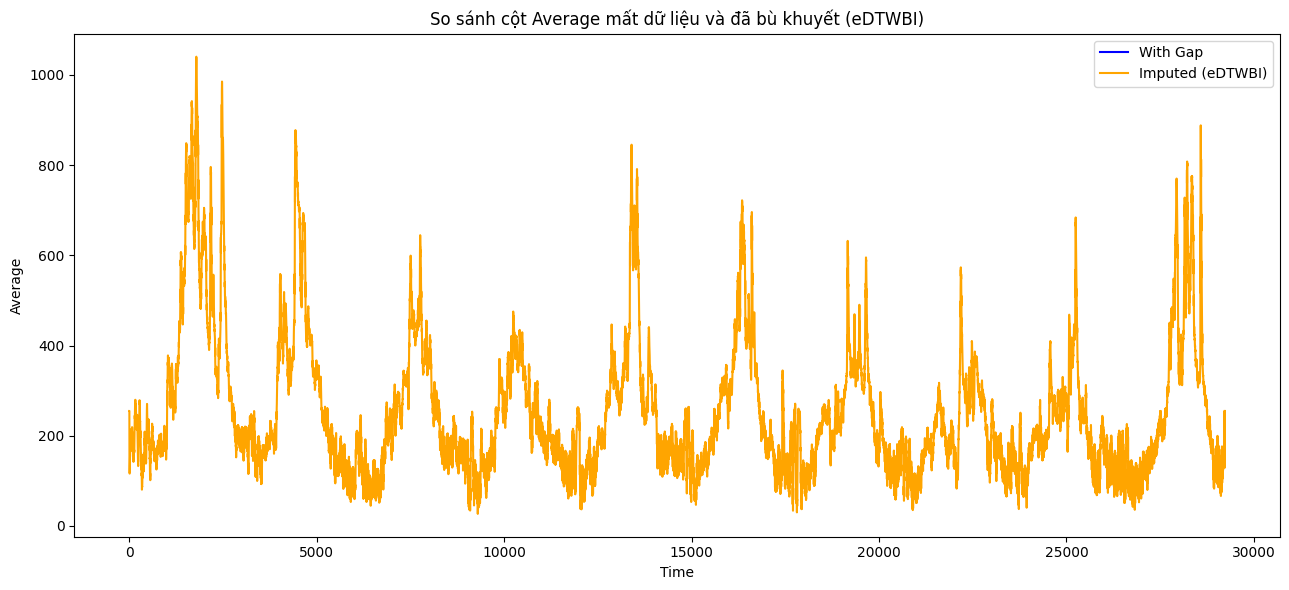

Đánh giá chất lượng imputation (trên vị trí bị mất dữ liệu):
similarity: nan
nmae: nan
rmse: nan
fsd: nan
fb: nan
fa2: 0.0


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
import warnings
warnings.filterwarnings("ignore")

# --- DTW distance function ---
def dtw_distance(s1, s2):
    n, m = len(s1), len(s2)
    dtw = np.full((n+1, m+1), np.inf)
    dtw[0, 0] = 0
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s1[i-1] - s2[j-1])
            dtw[i, j] = cost + min(dtw[i-1, j],    # insertion
                                   dtw[i, j-1],    # deletion
                                   dtw[i-1, j-1])  # match
    return dtw[n, m]

# --- Find all gap segments ---
def find_gaps(arr):
    gaps = []
    inside_gap = False
    for i, v in enumerate(arr):
        if pd.isna(v):
            if not inside_gap:
                gap_start = i
                inside_gap = True
        else:
            if inside_gap:
                gap_end = i - 1
                gaps.append((gap_start, gap_end))
                inside_gap = False
    if inside_gap:
        gaps.append((gap_start, len(arr)-1))
    return gaps

# --- eDTWBI core: replace all gaps using DTW-matched subsequences ---
def edtwbi_impute(df, value_col, ref_col, window=5, k_best=3, cosine_threshold=0.6):
    original = df[value_col].to_numpy(float)
    ref = df[ref_col].to_numpy(float)
    imputed = original.copy()
    gaps = find_gaps(original)
    for (start, end) in gaps:
        gap_len = end - start + 1
        # Extract context before and after gap
        left_start = max(0, start-window)
        left_context = ref[left_start:start]
        right_end = min(len(ref), end+window+1)
        right_context = ref[end+1:right_end]
        # Gather valid candidate subsequences for comparison
        candidates = []
        for idx in range(window, len(ref)-window-gap_len+1):
            cand_left = ref[idx-window:idx]
            cand_gap = ref[idx:idx+gap_len]
            cand_right = ref[idx+gap_len:idx+gap_len+window]
            # Ensure no missing in candidate comparison regions
            if np.isnan(cand_gap).any() or np.isnan(cand_left).any() or np.isnan(cand_right).any():
                continue
            # Cosine similarity thresholding (optional, helps speed)
            if len(left_context)==window and len(cand_left)==window:
                sim1 = 1 - cosine(left_context, cand_left)
            else:
                sim1 = 0
            if len(right_context)==window and len(cand_right)==window:
                sim2 = 1 - cosine(right_context, cand_right)
            else:
                sim2 = 0
            avg_sim = (sim1 + sim2)/2
            if avg_sim >= cosine_threshold:
                d = dtw_distance(left_context, cand_left) + dtw_distance(right_context, cand_right)
                candidates.append((d, idx, cand_gap.copy()))
        # Chọn k subsequences DTW nhỏ nhất, lấy trung bình
        if len(candidates) > 0:
            candidates.sort()
            best_gaps = [c[2] for c in candidates[:k_best]]
            best_fill = np.mean(best_gaps, axis=0)
            imputed[start:end+1] = best_fill
        else:
            # Fallback: dùng mean của ref
            imputed[start:end+1] = np.nanmean(ref)
    df[value_col + '_imputed'] = imputed
    return df

# --- Quality metrics ---
def quality_metrics(true, imputed, mask):
    gt = true[mask]
    pred = imputed[mask]
    similarity = np.corrcoef(gt, pred)[0,1] if len(gt) > 0 else np.nan
    nmae = np.mean(np.abs(gt - pred)) / (np.mean(np.abs(gt))+1e-8) if np.mean(np.abs(gt)) != 0 else np.nan
    rmse = np.sqrt(np.mean((gt - pred)**2)) if len(gt) > 0 else np.nan
    fsd = np.std(gt - pred) / (np.std(gt)+1e-8) if np.std(gt) > 0 else np.nan
    fb = (np.mean(pred) - np.mean(gt)) / (np.mean(gt)+1e-8) if np.mean(gt) != 0 else np.nan
    fa2 = np.mean((np.abs(gt-pred)/np.maximum(np.abs(gt),np.abs(pred))) < 0.5) if len(gt) > 0 else np.nan
    return similarity, nmae, rmse, fsd, fb, fa2

# --- MAIN pipeline ---
# Load data
df = pd.read_csv('/kaggle/input/misshanooi/Impute_misvalues_hanoi.csv')

# Tùy chỉnh tham số dưới đây cho hợp dữ liệu:
window = 5         # Độ dài subsequence tham chiếu
k_best = 3         # Số subsequence tốt nhất lấy trung bình khi nội suy
cosine_threshold = 0.6 # Ngưỡng cosine similarity để lọc candidate subsequence

# Lưu lại ground truth để đánh giá (nếu có)
original = df['Average'].copy()

# Thực hiện imputation bằng eDTWBI (chuyên nghiệp)
df = edtwbi_impute(df, 'Average', 'Waterlevel', window, k_best, cosine_threshold)

# Visualization
plt.figure(figsize=(13,6))
plt.plot(df['Average'], label='With Gap', color='blue')
plt.plot(df['Average_imputed'], label='Imputed (eDTWBI)', color='orange')
plt.title('So sánh cột Average mất dữ liệu và đã bù khuyết (eDTWBI)')
plt.xlabel('Time')
plt.ylabel('Average')
plt.legend()
plt.tight_layout()
plt.show()

# Quality metrics on GAPS only (nếu bạn biết các vị trí ground truth)
mask = df['Average'].isna()
similarity, nmae, rmse, fsd, fb, fa2 = quality_metrics(original.values, df['Average_imputed'].values, mask)

print("Đánh giá chất lượng imputation (trên vị trí bị mất dữ liệu):")
print(f"similarity: {similarity}")
print(f"nmae: {nmae}")
print(f"rmse: {rmse}")
print(f"fsd: {fsd}")
print(f"fb: {fb}")
print(f"fa2: {fa2}")

# Save output
df.to_csv('/kaggle/working/Imputed_misvalues_hanoi_edtwbi.csv', index=False)


In [2]:
import numpy as np

def get_eval_metrics(original, imputed, mask_missing):
    """
    original: mảng dữ liệu gốc (không thiếu)
    imputed: mảng đã điền khuyết
    mask_missing: mảng bool: True tại các index bị thiếu (chỉ đánh giá đúng trên vị trí imputation)
    """
    gt = original[mask_missing]
    pred = imputed[mask_missing]

    # Xử lý ngoại lệ nan
    valid = (~np.isnan(gt)) & (~np.isnan(pred))
    if valid.sum() == 0:
        print("No valid imputed values to evaluate!")
        return

    gt = gt[valid]
    pred = pred[valid]

    # Metrics chuẩn
    mae = np.mean(np.abs(gt - pred))
    rmse = np.sqrt(np.mean((gt - pred)**2))
    nmae = mae / (np.mean(np.abs(gt)) + 1e-8)
    similarity = np.dot(gt, pred) / (np.linalg.norm(gt) * np.linalg.norm(pred) + 1e-8)
    
    # First-order structural difference (fsd)
    fsd = np.mean(np.abs(np.diff(gt) - np.diff(pred)))
    # First-order bias (fb)
    fb = np.mean((gt - pred) / (gt + 1e-8))
    # Squared-shape similarity fa2
    fa2 = np.dot(gt**2, pred**2) / (np.linalg.norm(gt**2) * np.linalg.norm(pred**2) + 1e-8)
    
    print("similarity:", similarity)
    print("nmae:", nmae)
    print("rmse:", rmse)
    print("fsd:", fsd)
    print("fb:", fb)
    print("fa2:", fa2)

    return {
        "similarity": similarity,
        "nmae": nmae,
        "rmse": rmse,
        "fsd": fsd,
        "fb": fb,
        "fa2": fa2
    }

# Ví dụ sử dụng:
# mask_missing = np.isnan(data_with_missing)  # True tại các vị trí bị thiếu
# get_eval_metrics(original_full, imputed_full, mask_missing)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine, euclidean
import warnings
warnings.filterwarnings("ignore")

def find_gaps(arr):
    gaps = []
    inside_gap = False
    for i, v in enumerate(arr):
        if pd.isna(v):
            if not inside_gap:
                gap_start = i
                inside_gap = True
        else:
            if inside_gap:
                gap_end = i - 1
                gaps.append((gap_start, gap_end))
                inside_gap = False
    if inside_gap:
        gaps.append((gap_start, len(arr)-1))
    return gaps

def fast_edtwbi_impute(df, value_col, ref_col, window=3, k_best=3, cosine_threshold=0.6, candidate_range=300):
    original = df[value_col].to_numpy(float)
    ref = df[ref_col].to_numpy(float)
    imputed = original.copy()
    gaps = find_gaps(original)
    for (start, end) in gaps:
        gap_len = end - start + 1
        # Context
        left_start = max(0, start-window)
        left_context = ref[left_start:start]
        right_end = min(len(ref), end+window+1)
        right_context = ref[end+1:right_end]
        # Candidate chỉ quanh gap
        candidates = []
        search_from = max(0, start-candidate_range)
        search_to = min(len(ref)-window-gap_len, end+candidate_range)
        for idx in range(search_from+window, search_to):
            candidate_left = ref[idx-window:idx]
            candidate_gap = ref[idx:idx+gap_len]
            candidate_right = ref[idx+gap_len:idx+gap_len+window]
            if np.isnan(candidate_gap).any() or np.isnan(candidate_left).any() or np.isnan(candidate_right).any():
                continue
            sim1 = 1 - cosine(left_context, candidate_left) if len(candidate_left) == len(left_context) else 0
            sim2 = 1 - cosine(right_context, candidate_right) if len(candidate_right) == len(right_context) else 0
            avg_sim = (sim1 + sim2)/2
            if avg_sim < cosine_threshold:
                continue
            dist = euclidean(left_context, candidate_left) + euclidean(right_context, candidate_right)
            candidates.append((dist, candidate_gap.copy()))
        if len(candidates) > 0:
            candidates.sort()
            best_gaps = [c[1] for c in candidates[:k_best]]
            fill = np.mean(best_gaps, axis=0)
            imputed[start:end+1] = fill
        else:
            imputed[start:end+1] = np.nanmean(ref)
    df[value_col + '_imputed'] = imputed
    return df

# --- MAIN ---
df = pd.read_csv('/kaggle/input/misshanooi/Impute_misvalues_hanoi.csv')
window = 3
k_best = 3
cosine_threshold = 0.6
candidate_range = 300

df = fast_edtwbi_impute(df, 'Average', 'Waterlevel', window, k_best, cosine_threshold, candidate_range)

plt.figure(figsize=(13, 6))
plt.plot(df['Average'], label='With Gap', color='blue')
plt.plot(df['Average_imputed'], label='Imputed (fast eDTWBI)', color='orange')
plt.title('So sánh cột Average mất dữ liệu và đã bù khuyết (eDTWBI tối ưu tốc độ)')
plt.xlabel('Time')
plt.ylabel('Average')
plt.legend()
plt.tight_layout()
plt.show()

df.to_csv('/kaggle/working/Imputed_misvalues_hanoi_fast_edtwbi.csv', index=False)
